<a href="https://colab.research.google.com/github/bejide-ux/alx/blob/main/LULC_Resaerch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import keras
from keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import Model
import rasterio
import earthpy.plot as ep
from keras.utils import to_categorical, plot_model, model_to_dot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors


In [13]:
#Load image
!pip install rasterio
import rasterio
import numpy as np
import earthpy.plot as ep

image = rasterio.open(IMAGE_PATH)
bandNum = image.count
height = image.height
width = image.width
crs = image.crs
transform = image.transform
shape = (height, width, bandNum)


#Image visualization
image_vis =[]
for x in [6, 5, 4]:
  image_vis.append(image.read(x))
  image_vis = np.stack(image_vis)

  plot_size =  (8,8)
  ep.plot_rgb(
      image_vis,
      figsize=plot_size,
      stretch = True  # Correct the typo here
      )

IndexError: index 1 is out of bounds for axis 0 with size 1

In [3]:
#mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
#parameter
!pip install rasterio
import rasterio
FEATURES =  ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'NBR', 'NDMI', 'NDWI', 'NDBI', 'NDBaI']
LABEL = ['Landuse']
SPLIT = ['Landuse']
N_CLASSES= 5
CLASSES = [1, 2, 3, 4, 5]
CLASS_NAMES = ['Openspace', 'Builtup', 'Water', 'LessDense', 'VeryDense']
PALETTE =  ['#98ff00', '#ff286e', '#0000ff', '#d63000', '#fffa7a']
SAMPLE_PATH = '/content/drive/MyDrive/Deep Learning/Ekiti_State_2023_Samples.csv'
IMAGE_PATH = '/content/drive/MyDrive/Deep Learning/Ekiti_State_2023.tif'

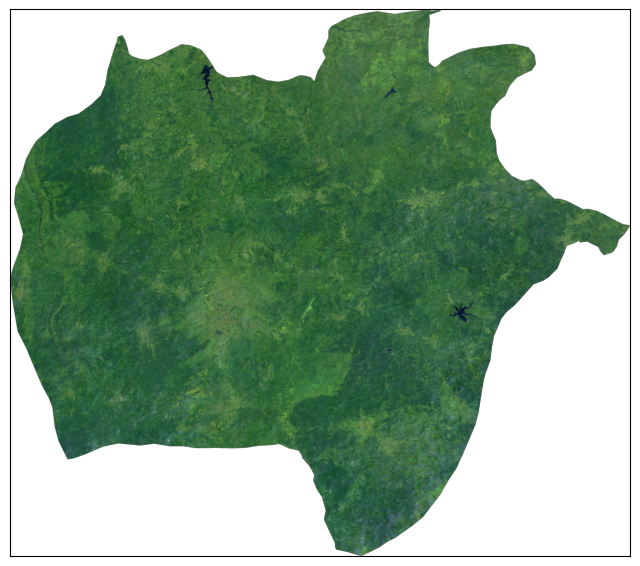

<Axes: >

In [19]:
#Load image
!pip install rasterio
import rasterio
import numpy as np
import earthpy.plot as ep

image = rasterio.open(IMAGE_PATH)
bandNum = image.count
height = image.height
width = image.width
crs = image.crs
transform = image.transform
shape = (height, width, bandNum)


#Image visualization
image_vis =[]
for x in [6, 5, 2]:  # Read bands 4, 3, and 2
  image_vis.append(image.read(x))
image_vis = np.stack(image_vis)

plot_size =  (8,8)
ep.plot_rgb(
    image_vis,
    rgb=(0, 1, 2), # Map bands 4, 3, 2 to RGB
    figsize=plot_size
)

In [22]:
#Read sample
!pip install pandas
import pandas as pd
sample = pd.read_csv(SAMPLE_PATH)
sample= sample.sample(frac=1) #shuffle data
sample

,system:index,Landuse,NBR,NDBI,NDBaI,NDMI,NDWI,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,.geo
19,0_1_1_1_1_1_9_1,1,0.091571,-0.003248,0.088350,0.003248,-0.235952,9159.0,10932.0,12064.0,17684.0,17569.5,14717.0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
165,0_2_1_1_1_1_63_0,1,0.220925,-0.140619,0.082881,0.140619,-0.270640,10655.0,12995.0,12885.0,22639.0,17057.0,14446.0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
841,3_1_1_2_64_1,4,0.174725,-0.062924,0.113043,0.062924,-0.266135,8630.0,10393.0,10217.0,17931.0,15808.0,12597.0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
361,1_1_1_1_1_2_109_1,2,0.144456,-0.063389,0.081817,0.063389,-0.233686,9473.0,10733.0,10908.0,17279.0,15219.0,12917.0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
801,3_1_1_2_42_0,4,0.206711,-0.088799,0.120117,0.088799,-0.299727,8764.0,10134.0,10247.0,18809.0,15741.0,12365.0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,3_1_1_2_45_1,4,0.257987,-0.135042,0.127383,0.135042,-0.324322,8476.0,9623.0,9091.0,18861.0,14373.0,11125.0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
881,3_1_1_2_88_0,4,0.223361,-0.110934,0.115284,0.110934,-0.299751,8992.5,10676.0,10196.5,19816.0,15858.5,12580.0,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
903,3_1_1_2_99_1,4,0.247696,-0.126573,0.125043,0.126573,-0.303383,9189.0,10691.5,10343.5,20004.0,15509.0,12061.5,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1121,3_2_1_2_49_1,4,0.238672,-0.119613,0.122557,0.119613,-0.313323,8588.0,10140.5,9727.5,19394.5,15250.5,11920.5,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [ ]:
print(sample)

# New Section

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

neuron = 64
kernel = (3, 3)  # kernel size for Conv2D
drop = 0.2
N_CLASSES = 5

# Define the model
model = Sequential([
    Conv2D(neuron, kernel, activation='relu', input_shape=(2960, 3356, 6)),  # Update input shape to (height, width, channels)
    Conv2D(neuron, kernel, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(drop),
    Conv2D(neuron * 2, kernel, activation='relu'),
    Conv2D(neuron * 2, kernel, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(drop),
    Conv2D(neuron * 4, kernel, activation='relu'),
    Conv2D(neuron * 4, kernel, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(drop),
    Flatten(),
    Dense(neuron * 4, activation='relu'),
    Dropout(drop),
    Dense(neuron * 2, activation='relu'),
    Dropout(drop),
    Dense(neuron, activation='relu'),
    Dropout(drop),
    Dense(N_CLASSES + 1, activation='softmax')
])

# Print the model summary
model.summary()
